![PyTorch](https://devblogs.nvidia.com/wp-content/uploads/2017/04/pytorch-logo-dark.png)

An open source machine learning framework that accelerates the path from research prototyping to production deployment.



# Tensor - Pytorch's core data structure

In Python we can create lists, lists of lists, lists of lists and so on. In NumPy there is a `numpy.ndarray` which represents `n`- dimensional array. In math there is a special name for the generalization of vectors and matrices to a higher dimensional space - a tensor

Tensor is an entity with a defined number of dimensions called an order (rank). 

**Scalar** can be considered as a rank-0-tensor. 

**Vector** can be introduced as a rank-1-tensor. 

**Matrices** can be considered as a rank-2-tensor.

# Tensor Basics

Let's import the torch module first.

![alt text](https://drive.google.com/uc?export=view&id=16V0Qu14SpuREXohTVUNu5Oa0q4irfhnD)

In [1]:
import numpy as np
import torch

## Tensor Creation
Let's view examples of matrices and tensors generation

2-dimensional (rank-2) tensor of zeros:

In [5]:
torch.zeros(3, 4)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

Random rank-3 tensor:
_read the print below and convince yourself how this is a rank-3-tensor and learn what those 2, 3, 4 values are there for_

In [6]:
torch.rand(2, 3, 4) # 2 is the rank, (3,4) is 2D matrix dimension - (z, x,y) 

tensor([[[0.9816, 0.0169, 0.1593, 0.3057],
         [0.6180, 0.2542, 0.6552, 0.5035],
         [0.2654, 0.6375, 0.2998, 0.8766]],

        [[0.8426, 0.2437, 0.0415, 0.2209],
         [0.4746, 0.1494, 0.4093, 0.7759],
         [0.3466, 0.7963, 0.1736, 0.7978]]])

![alt text](https://drive.google.com/uc?export=view&id=19Ap8UbwVu_J9KSN5NIX3Tj2W3YjGCafR)

I am hoping you have noticed 4-elements in a row, 3 rows making one block and there are 2 blocks. 

Random rank-4-tensor:

In [9]:
torch.rand(2, 2, 2, 3) #-> (vertical rank, z, x, y)

tensor([[[[0.2102, 0.9507, 0.5753],
          [0.7456, 0.0324, 0.1236]],

         [[0.8351, 0.1725, 0.0415],
          [0.6712, 0.1897, 0.8616]]],


        [[[0.7761, 0.8780, 0.9321],
          [0.4795, 0.7163, 0.0063]],

         [[0.8958, 0.9194, 0.7109],
          [0.9134, 0.1564, 0.3118]]]])

![alt text](https://drive.google.com/uc?export=view&id=13VknvHj2d6sB7gqehHw95VJCTcP_NnA9)

## Question 1:

How many dimensions are there in a tensor defined as below?

In [ ]:
torch.rand(1, 1, 1, 1) # 4 dimensions

tensor([[[[0.4529]]]])

.

---


There are many more ways to create tensor using some restrictions on values it should contatn - for the full reference, please follow the [official docs](https://pytorch.org/docs/stable/torch.html#creation-ops). 
Random sampling creation ops are listed under Random sampling and include: torch.rand() torch.rand_like() torch.randn() torch.randn_like() torch.randint() torch.randint_like() torch.randperm() You may also use torch.empty() with the In-place random sampling methods to create torch.Tensor s with values sampled from a broader range of distributions.

.
---


# Python / NumPy / Pytorch interoperability

You can create tensors from python as well as numpy arrays. You can also convert torch tensors to numpy arrays. So, the interoperability between torch and numpy is pretty good. 

In [15]:
python_list = [1,2]
python_list
np.array(python_list)
torch.tensor(np.array(python_list))
torch.from_numpy(np.array(python_list)).numpy()

array([1, 2])

In [16]:
# Simple Python List
python_list = [1, 2]

# Create a numpy array from python list
numpy_array = np.array(python_list)

# Create a torch Tensor from python list
tensor_from_list = torch.tensor(python_list)

# Create a torch Tensor from Numpy array
tensor_from_array = torch.tensor(numpy_array)

# Another way to create a torch Tensor from Numpy array (share same storage)
tensor_from_array_v2 = torch.from_numpy(numpy_array)

# Convert torch tensor to numpy array
array_from_tensor = tensor_from_array.numpy()

print('List:   ', python_list)
print('Array:  ', numpy_array)
print('Tensor: ', tensor_from_list)
print('Tensor: ', tensor_from_array)
print('Tensor: ', tensor_from_array_v2)
print('Array:  ', array_from_tensor)

List:    [1, 2]
Array:   [1 2]
Tensor:  tensor([1, 2])
Tensor:  tensor([1, 2])
Tensor:  tensor([1, 2])
Array:   [1 2]


**Difference between** `torch.Tensor` **and** `torch.from_numpy`

forch.from_numpy - uses the same memory as the numpy array. so if there is any update in numpy array, it would also update the torch tensor


Pytorch aims to be an effective library for computations. What does it mean? It means that pytorch avoids memory copying if it can. 

In [18]:
numpy_array[0] = 10

print('Array:  ', numpy_array)
print('Tensor: ', tensor_from_array)
print('Tensor: ', tensor_from_array_v2)

Array:   [10  2]
Tensor:  tensor([1, 2])
Tensor:  tensor([10,  2])


## Question 2:

Assume that we moved our complete (cats vs dogs) image dataset to numpy arrays. Then we use torch.from_numpy to convert these images to tensor. Then we apply a specific data augmentation strategy called "CutOut" which blocks a portion of the image directly on these tensors. What will happen to the accuracy of a model trained on this strategy compared to the one without this strategy? CutOut strategy is shown below: 

![CutOut](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSnSyN835AmtQPKQbPjDHX-FmshNilbtexX95cRGQPwl56QCGDn)


##### Ans: Cutouts are one of the regularization techniques applied to reduce the over fitting and help the model generalize. So the accuracy of the training dataset is expected to decrease, how ever we can expect the overfitting to also come down. 

---

## Question 3:
Why do you think we are observing this behavior?



---




We have two different ways to create tensor from its NumPy counterpart - one copies memory and another one shares the same underlying storage. It works in the opposite way:

In [19]:
array_from_tensor = tensor_from_array.numpy()
print('Tensor: ', tensor_from_array)
print('Array: ', array_from_tensor)

tensor_from_array[0] = 11
print('Tensor: ', tensor_from_array)
print('Array: ', array_from_tensor)

Tensor:  tensor([1, 2])
Array:  [1 2]
Tensor:  tensor([11,  2])
Array:  [11  2]


## Data types

The basic data type of all Deep Learning-related operations is float, but sometimes you may need something else. Pytorch support different number types for its tensors the same way NumPy does it - by specifying the data type on tensor creation or via casting. Ths full list of supported data types can be found [here](https://pytorch.org/docs/stable/tensors.html). 

In [20]:
tensor = torch.zeros(2, 2)
print('Tensor with default type: ', tensor)
tensor = torch.zeros(2, 2, dtype=torch.float16)
print('Tensor with 16-bit float: ', tensor)
tensor = torch.zeros(2, 2, dtype=torch.int16)
print('Tensor with integers: ', tensor)
tensor = torch.zeros(2, 2, dtype=torch.bool)
print('Tensor with boolean data: ', tensor)

Tensor with default type:  tensor([[0., 0.],
        [0., 0.]])
Tensor with 16-bit float:  tensor([[0., 0.],
        [0., 0.]], dtype=torch.float16)
Tensor with integers:  tensor([[0, 0],
        [0, 0]], dtype=torch.int16)
Tensor with boolean data:  tensor([[False, False],
        [False, False]])




---


## Question 4:
We saw above that some times numpy and tensors share same storage and changing one changes the other. 
If we define a rank-2-tensor with ones (dtype of f16), and then convert it into a numpy data type using tensor.numpy() and store it in a variable called "num", and then we perform this operation `num = num * 0.5`, will the original tensor have 1.0s or 0.5s as its element values? 


ANS - 0.1


In [5]:
tensor = torch.ones(2,2)
num = tensor.numpy()
num = num*0.5
print(tensor, num)

tensor = torch.ones(2,2)
num = tensor.numpy()
num[:] = num*0.5
print(tensor,num)


tensor([[1., 1.],
        [1., 1.]]) [[0.5 0.5]
 [0.5 0.5]]
tensor([[0.5000, 0.5000],
        [0.5000, 0.5000]]) [[0.5 0.5]
 [0.5 0.5]]




---

## Question 5: 
If the operation `num = num*5` is changed to `num[:] = num*5` will the original tensor have 1.0s or 0.5s as its element values? 



---
Answer : 0.5s


## Indexing

Tensor provides access to its elements via the same `[]` operation as a regular python list or NumPy array. However, as you may recall from NumPy usage, the full power of math libraries is accessible only via vectorized operations, i.e. operations without explicit looping over all vector elements in python and using implicit optimized loops in C/C++/CUDA/Fortran/etc. available via special function calls. Pytorch employs the same paradigm and provides a wide range of vectorized operations. Let's take a look at some examples. 

Joining a list of tensors together with `torch.cat`

In [158]:
a = torch.zeros(3, 2)
b = torch.ones(3, 2)
print(a,b)
print(torch.cat((a, b), dim=1))

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]]) tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


TypeError: ignored



---

## Question 6: 
Is the transpose of concatenated a & b tensor on dimension 1, same as the contatenated tensor of a & b on dimension 0? 



---



Indexing with another tenxor/array:

In [13]:
a = torch.arange(start=0,end=10)
indices=torch.arange(0,10)%5
indices
# a[indices]

tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

In [14]:
a = torch.arange(start=0, end=10)
indices = np.arange(0, 10) > 5
print(a)
print(indices)
print(a[indices])

indices = torch.arange(start=0, end=10) %5
print(indices)
print(a[indices])

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
[False False False False False False  True  True  True  True]
tensor([6, 7, 8, 9])
tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])




---

## Question 7:

`a` is defined as `torch.arange(start=0, end=10)`. We will create `b` using the two operations as below. In both cases do we get the same value?


1.   indices variable created by the modulo operation on arange between 0 and 10. Then a new varialble `b` is created from `a` using the last 5 elements of indices. 
2.   indices variable created by the modulo operation on arange betwenn 1 and 11. Then a new varialble `b` is created from `a` using the last 5 elements of indices. 



---




In [15]:
a = torch.arange(0,10)
indices = np.arange(0,10)
a

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

What should we do if we have, say, rank-2-tensor and want to select only some rows?

In [36]:
tensor = torch.rand((5, 3))
rows = torch.tensor([0, 2])
print(tensor)
print(rows)
tensor[rows].shape # prints the 0th row and 2nd row of the matrix. 

tensor.shape

tensor([[0.0128, 0.0765, 0.1307],
        [0.2077, 0.6056, 0.0650],
        [0.3486, 0.6488, 0.8909],
        [0.0674, 0.4303, 0.1391],
        [0.2241, 0.6711, 0.8432]])
tensor([0, 2])


torch.Size([5, 3])



---

## Question 8: 

Consider a tensor defined as `torch.rand((6, 5))`. Is the shape of the new tensor created by taking the 0th, 2nd and 4th row of the old tensor same as the shape of the a newer tensor created by taking the 0th, 2nd and 4th row of the old tensor after transposing it by operation `torch.transpose(tensor, 0, 1)` ?



---
ANS : Both the shape are same 3x5


In [35]:
tensor1 = torch.rand((6,5))
rows = torch.tensor([0,2,4])
print(tensor1)
print(tensor1[rows].shape)
torch.transpose(tensor,0,1).shape

tensor([[0.1340, 0.6044, 0.6979, 0.5386, 0.9898],
        [0.5076, 0.4015, 0.9950, 0.8383, 0.7485],
        [0.8934, 0.2546, 0.1449, 0.6432, 0.5193],
        [0.9392, 0.1719, 0.3038, 0.0615, 0.2590],
        [0.1690, 0.1776, 0.9023, 0.3810, 0.4329],
        [0.4428, 0.1444, 0.8657, 0.2488, 0.0696]])
torch.Size([3, 5])


torch.Size([3, 5])

## Tensor Shapes

Reshaping a tensor is a frequently used operation. We can change the shape of a tensor without the memory copying overhead. There are two methods for that: `reshape` and `view`. 

The difference is the following: 


*   view tries to return a tensor, and it shares the same memory with the original tensor. In case, if it cannot reuse the same memory due to [some reason](https://pytorch.org/docs/stable/tensors.html?highlight=view#torch.Tensor.view), it just fails. 
*   reshape always returns the tensor with the desired shape and tries to reuse the memory. If it cannot, it creates a copy

Let's see with the help of an example:

In [47]:
a = torch.rand(2,3,4) # rank 3 tensor of size 3x4
print(a)
print(a.data_ptr())
print(a.reshape(24)) # reshape the above matrix into a rank 1 vector
print(a.view(24)) # use view to reshape it to a vector. 

tensor([[[0.0608, 0.7966, 0.0983, 0.7740],
         [0.8656, 0.1983, 0.0563, 0.1921],
         [0.4389, 0.8670, 0.9977, 0.7847]],

        [[0.7184, 0.8960, 0.8383, 0.7252],
         [0.3030, 0.6589, 0.2540, 0.0780],
         [0.7129, 0.4408, 0.4825, 0.8566]]])
74874368
tensor([0.0608, 0.7966, 0.0983, 0.7740, 0.8656, 0.1983, 0.0563, 0.1921, 0.4389,
        0.8670, 0.9977, 0.7847, 0.7184, 0.8960, 0.8383, 0.7252, 0.3030, 0.6589,
        0.2540, 0.0780, 0.7129, 0.4408, 0.4825, 0.8566])
tensor([0.0608, 0.7966, 0.0983, 0.7740, 0.8656, 0.1983, 0.0563, 0.1921, 0.4389,
        0.8670, 0.9977, 0.7847, 0.7184, 0.8960, 0.8383, 0.7252, 0.3030, 0.6589,
        0.2540, 0.0780, 0.7129, 0.4408, 0.4825, 0.8566])


In [53]:
tensor = torch.rand(2, 3, 4)
print('Pointer to data: ', tensor.data_ptr()) #returns address of the 1st elemnt of tensor
print('Shape: ', tensor.shape)

reshaped = tensor.reshape(24) # reshape the rank 3 matrix into a vector of 24. 

view = tensor.view(3, 2, 4) #reshape it to a rank 4 matrix of 2x4
print('Reshaped tensor - pointer to data', reshaped.data_ptr()) # check the 1st address of reshaped tensor
print('Reshaped tensor shape ', reshaped.shape) # shape of the reshaped tensor

print('Viewed tensor - pointer to data', view.data_ptr()) # address of 1st element
print('Viewed tensor shape ', view.shape) # shape of view tensor

# assert tensor.data_ptr() == a.data_ptr() ,'the pointers do not show same location'
assert tensor.data_ptr() == view.data_ptr()

#np.all tests whether all elements in axis evaluates to true. if all true, it returns true. 
# np.flat iterates over all elements of the array. 
assert np.all(np.equal(tensor.numpy().flat, reshaped.numpy().flat)) 

print('Original stride: ', tensor.stride())
print('Reshaped stride: ', reshaped.stride())
print('Viewed stride: ', view.stride())

Pointer to data:  74874624
Shape:  torch.Size([2, 3, 4])
Reshaped tensor - pointer to data 74874624
Reshaped tensor shape  torch.Size([24])
Viewed tensor - pointer to data 74874624
Viewed tensor shape  torch.Size([3, 2, 4])
Original stride:  (12, 4, 1)
Reshaped stride:  (1,)
Viewed stride:  (8, 4, 1)


In [64]:
# what this basically does is to scan through the numbers in the array range returns the numbers
# for the required range [2:6] as array. 
# np.equal checks if the 2 arrays have equal values and returns true
# np.all returns true if all the values in the array are true. 

print(tensor.numpy())
np.equal(tensor.numpy().flat[2:6], reshaped.numpy().flat[2:6])

# tensor.numpy().flat[2:6]


[[[0.54293364 0.96003383 0.43156183 0.23007077]
  [0.8761629  0.49742353 0.24730307 0.40646297]
  [0.37842774 0.01630288 0.7893944  0.5130066 ]]

 [[0.579685   0.26418322 0.42006433 0.92489314]
  [0.6012276  0.9468158  0.3862571  0.16107637]
  [0.91461533 0.48169386 0.56510764 0.71869826]]]


array([ True,  True,  True,  True])

The basic rule about reshaping the tensor is definitely that you cannot change the total number of elements in it, so the product of all tensor's dimensions should always be the same. It gives us the ability to avoid specifying one dimension when reshaping the tensor - Pytorch can calculate it for us:

In [65]:
tensor.shape

torch.Size([2, 3, 4])

In [74]:
print(tensor.reshape(3, 2, 4).shape)
print(tensor.reshape(3, 2, -1).shape) # here -1 means that it does not matter how much columns, all I need is Rank 3 tensor and 2 rows per matrix. 
print(tensor.reshape(3, -1, 4).shape) # here what matters is 4 columns in each matrix.. dont care how many rows you create

torch.Size([3, 2, 4])
torch.Size([3, 2, 4])
torch.Size([3, 2, 4])




---


## Question 9:

Consider a tensor `a` created with [1, 2, 3] and [1, 2, 3] of size (2, 3) is reshaped with operation `.reshape(-1, 2)`. Also consider a tensor `b` created with [[2, 1]] and of size (1, 2), later operated with `view(2, -1)` operation. 

If we do a dot product of a and b (using `torch.mm`) and perform the sum of all the elements (using `torch.sum`) what do we get? (enter int value without any decimal point in the quiz)



---
ANS 18


In [101]:
c = torch.arange(1,4)
a = torch.cat((c, c), dim=0).reshape(2,3)
a1 = a.reshape(-1,2) # output of reshape should have 2 columns, dont care how many rows. shape (3,2)

b = torch.tensor([2,1])
b1 = b.view(2,-1) # shape 2,1

torch.sum(torch.mm(a1,b1)) # (3,2)*(2,1) = (3,1)



tensor(18)

**Alternative ways to view tensors** - `expand` or `expand_as`.



*   `expand` - requires the desired shape as an input
*   `expand_as` - uses the shape of another tensor

These operations "repeat" tensor's values along the specified axes without actually copying the data. 

As the documentation says, expand:


> returns a new view of the self tensor with singleton dimensions expanded to a larger size. Tensor can be also expanded to a larger number of dimensions, and the new ones will be appended at the front. For the new dimensions, the size cannot be set to -1. 

**Use case:**



*   index multi-channel tensor with single-channel mask - imagine a color image with 3 channels (RGB) and binary mask for the area of interest on that image. We cannot index the image with this kind of mask directly since the dimensions are different, but we can use `expand_as` operation to create a view of the mask that has the same dimensions as the image we want to apply it to, but has not copied the data. 

torch.Size([3, 256, 256])


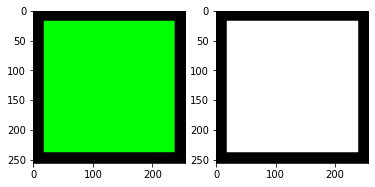

In [48]:
%matplotlib inline
from matplotlib import pyplot as plt

image = torch.zeros(size=(3,256,256),dtype=torch.int)
image[1,18:256-18,18:255-18]=255
image.shape
mask = torch.zeros(size=(256,256),dtype=torch.bool)
mask[18:256-18,18:256-18]=1
mask[18:238,18:238]

mask_expanded = mask.expand_as(image)
print(mask_expanded.shape)

mask_np = mask_expanded.numpy().transpose(1,2,0)*255
mask_np.shape
image_np = image.numpy().transpose(1,2,0)

fig,ax = plt.subplots(1,2)
ax[0].imshow(image_np)
ax[1].imshow(mask_np)

In [55]:
image[1,18:240,18:240]
mask

tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]])

torch.Size([3, 256, 256])


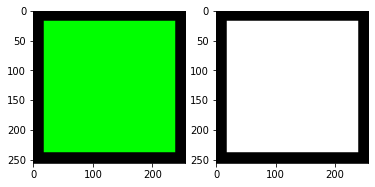

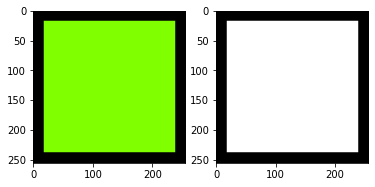

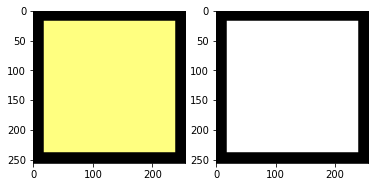

In [65]:
%matplotlib inline
from matplotlib import pyplot as plt

# Create a black image
image = torch.zeros(size=(3, 256, 256), dtype=torch.int)

# Leave the borders and make the rest of the image Green
image[1, 18:256 - 18, 18:256 - 18] = 255 # change the pixel values between 18 and 256-18 in both directions

# Create a mask of the same size
mask = torch.zeros(size=(256, 256), dtype=torch.bool) # create a matrix of 256,256 will all false. 

# Assuming the green region in the original image is the Region of interest, change the mask to white for that area
mask[18:256 - 18, 18:256 - 18] = 1

# Create a view of the mask with the same dimensions as the original image
mask_expanded = mask.expand_as(image)
print(mask_expanded.shape) # the rank of mask matrix is expanded to be same as image. 

mask_np = mask_expanded.numpy().transpose(1, 2, 0) * 255
image_np = image.numpy().transpose(1, 2, 0) 
# the tupple numbers are the axis 0, 1 and 2. This gives transponse on how you want to reshape.
#original shape was (3,256,256) will be transponsed into (256,256,3). The channel axis (0) will be moved 

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image_np)
ax[1].imshow(mask_np)
plt.show()

image[0, mask] += 128
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image_np)
ax[1].imshow(mask_np)
plt.show()

image[mask_expanded] += 128
image.clamp_(0, 255)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image_np)
ax[1].imshow(mask_np)
plt.show()

In the example above, one can also find a couple of useful tricks:


*   `clamp` method and function is a Pytorch's analogue of NumPy's `clip` function
*   many operations on tensors have in-place form, that does not return modified data, but change values in the tensor. The in-place version of the operation has trailing underscore according to Pytorch's naming convension - in the exmaple above it is `clamp_`
*   tensors have the same indexing as Numpy's arrays - one can use `:` seperated range, negative indexes and so on.


.


---

# Images and their representations

Now, let's discuss images, their representations and how different Python librarties work with them. 

Probably, the most well-known library for image loading and simple processing is [Pillow](https://pillow.readthedocs.io/en/stable/). 

However, many people in deep learning area stick with OpenCV for image loading and processing with some usage of another libraries when it is justified by performance/functionality. This is because OpenCV is in general much faster than the other libraries. Here you can find a couple of benchmarks: 

*   https://www.kaggle.com/zfturbo/benchmark-2019-speed-of-image-reading
*   https://github.com/albumentations-team/albumentations#benchmarking-results

To sum up the benchmarks above, there are two most common image formats, PNG and JPEGs. If your data is in PNG format - use OpenCV to read it. If it is in JPEG - use libturbojpeg. For image processing, use OpenCV if possible. _We will be using PIL a lot along with these._

As you will read the code from others, you may find out that some of them use Pillow/something else to read data. You should know, that color image representations in OpenCV and other libraries are different - OpenCV uses "BGR" channel order, while others use "RGB" one. 

To change "BRG" <-> "RGB" the only thing we need to do it to change channel order.

Image Successfully Downloaded:  astrobiologi (3).jpg


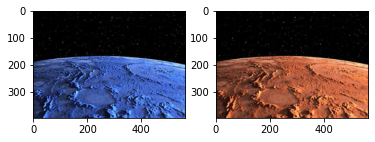

In [96]:
import wget


def url_to_img(url):
  img = wget.download(url)
  print('Image Successfully Downloaded: ', image_filename)
  # bgr_image = cv2.imread(img) 

  return img

image_filename = url_to_img('https://scx1.b-cdn.net/csz/news/800/2020/astrobiologi.jpg')
bgr_image = cv2.imread(image_filename) 
rgb_image = bgr_image[..., ::-1]
fig, ax = plt.subplots(1, 2)
ax[0].imshow(bgr_image)
ax[1].imshow(rgb_image)
plt.show()


33.860223011643974

In [97]:
# %matplotlib inline
# from matplotlib import pyplot as plt
# import cv2


# bgr_image = cv2.imread('mars.jpg') 
# # remember to add your own image in case you run this block, if you want to use the same image, 
# # download it from: https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRCA40ftnscVzfV8ft8e7vIzQXfXeZdtco8nknJrfCUW6INI40U
# rgb_image = bgr_image[..., ::-1]
# fig, ax = plt.subplots(1, 2)
# ax[0].imshow(bgr_image)
# ax[1].imshow(rgb_image)
# plt.show()

In [111]:
# get the pixel values of blue and red channels.

# Red Channel
red_channel = bgr_image[:,:,2]
print('red channel: ',round(red_channel.mean(),2), red_channel.min(), red_channel.max())

# Blue Channel
blue_channel = bgr_image[:,:,0]
print('blue channel:', round(blue_channel.mean(),2), blue_channel.min(), blue_channel.max())

red channel:  90.36 0 255
blue channel: 33.86 0 255




---

## Question 10:

Looking at the results above it can be said that the pixel values in the blue channels would be very small compared to red channel. True/False?


---
ANS :

Yes the average pixel value for blue is 33.9 vs red is 90.4



# Autograd

Pytorch supports automatic differentiation. The module which implements this is called **AutoGrad**. It calculates the gradients and keeps track in forward and backward passes. For primitive tensors, you need to enable or disable it using the `required_grad` flag. But, for advanced tensors, it is enabled by default

In [116]:
a =torch.rand((3,5), requires_grad=True)
result = a*5

mean_result = result.sum()
mean_result

mean_result.backward()
print(a.grad)

tensor([[5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.]])


In [122]:
a = torch.rand((3, 5), requires_grad = True)
print(a)
result = a * 5
print(result)

# grad can be implicitly created only for scalar outputs
# so let's calculate the sum here so that the output becomes a scalar and we can apply a backward pass
mean_result = result.sum()
print(mean_result)
# calculate gradient
mean_result.backward()
# print gradient of a
print(a.grad)

tensor([[0.5161, 0.9847, 0.0746, 0.4866, 0.9663],
        [0.9996, 0.6934, 0.9681, 0.6109, 0.5896],
        [0.3048, 0.0573, 0.5673, 0.3864, 0.8873]], requires_grad=True)
tensor([[2.5804, 4.9237, 0.3728, 2.4330, 4.8314],
        [4.9979, 3.4669, 4.8407, 3.0544, 2.9478],
        [1.5240, 0.2866, 2.8363, 1.9318, 4.4364]], grad_fn=<MulBackward0>)
tensor(45.4641, grad_fn=<SumBackward0>)
tensor([[5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.]])




---

## Question 11: 

Why the gradient of a is all 5s above?



---
ANS:

d/da(5*a) = 5

As we see, Pytorch automagically calculated the gradient value for us. It looks to be the correct value - we multiplied an input by 5, so the gradient of this operation equals to 5.

# Disabling Autograd for tensors

We don't need to compute gradients for all the variables that are involved in the pipeline. The Pytorch API provides 2 ways to disable autograd.

`detach` - returns a copy of the tensor with autograd disabled. This 

1.   copy is built on the same memory as the original tensor, so in-place size / stride / storage changes (such as resize_ / resizeas / set / transpose) modifications are not allowed.
2.   torch.no_grad() - It is a context manager that allows you to guard a series of operations from autograd without creating new tensors.

In [123]:
a = torch.rand((3, 5), requires_grad=True)
detached_a = a.detach() # detached_a matrix will have no backward
detached_result = detached_a * 5 # multiply the detached_a with 5
result = a * 10 # this is undetached matrix. 
# we cannot do backward pass that is required for autograd using multideminsional output,
# so let's calculate the sum here
mean_result = result.sum()
mean_result.backward()
a.grad

tensor([[10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.]])

In [129]:
a = torch.rand((3, 5), requires_grad=True)
print(a)
with torch.no_grad():
    detached_result = a * 5 # multiplies the a matrix with 5 without backward grad
    print(detached_result)
result = a * 10 # multiplies the matrix but contains backward. 
print(result)
# we cannot do backward pass that is required for autograd using multideminsional output,
# so let's calculate the sum here
mean_result = result.sum() # calculate sum of the result matrix
mean_result.backward() # calculate backwards. 
a.grad # since we have backward only for result and not detached_result, the gradient will be 10 and not 5

tensor([[0.9356, 0.5959, 0.0341, 0.6743, 0.4378],
        [0.4615, 0.4527, 0.3236, 0.8487, 0.4934],
        [0.0676, 0.3442, 0.7722, 0.4411, 0.1084]], requires_grad=True)
tensor([[4.6781, 2.9794, 0.1703, 3.3715, 2.1888],
        [2.3073, 2.2635, 1.6181, 4.2434, 2.4669],
        [0.3382, 1.7212, 3.8612, 2.2054, 0.5418]])
tensor([[9.3563, 5.9587, 0.3407, 6.7431, 4.3776],
        [4.6147, 4.5270, 3.2361, 8.4867, 4.9339],
        [0.6764, 3.4425, 7.7223, 4.4108, 1.0837]], grad_fn=<MulBackward0>)


tensor([[10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10.]])

# Custom Network

A fully-connected ReLU network with one hidden layer and no biases, trained to predict y from x by minimizing squared Euclidean distance.

This implementation uses PyTorch tensors to manually compute the forward pass, loss, and backward pass.

A PyTorch Tensor is basically the same as a numpy array: it does not know anything about deep learning or computational graphs or gradients, and is just a generic n-dimensional array to be used for arbitrary numeric computation.

The biggest difference between a numpy array and a PyTorch Tensor is that a PyTorch Tensor can run on either CPU or GPU. To run operations on the GPU, just cast the Tensor to a cuda datatype.

In [154]:
dtype = torch.float
device = torch.device("cpu")

# N Batch size, D_in input dimension, H - hidden dimension, D-out - output dimension

N, D_in, H, D_out = 64,1000,100,10

# define x and y
x = torch.randn(N, D_in, device=device, dtype=dtype) # 64x1000
y = torch.randn(N, D_out, device=device, dtype=dtype) # 1000x10

x.shape, y.shape

# randomly initialize weights
w1 = torch.randn(D_in,H,device=device, dtype=dtype) #1000 x100
w2 = torch.randn(H,D_out,device=device,dtype=dtype) #100 x10

learning_rate=1e-06

# loop
for t in range(500):
  #forward
  h = x.mm(w1) #[(64,1000)*(1000,100) = (64,100)]
  h_relu = h.clamp(min=0) #(64,100)
  y_pred = h_relu.mm(w2) #[(64,100)*(100,10)=(64,10)]

  # Loss
  loss = (y_pred-y).pow(2).sum().item() # item extracts the value. 
  print(t,loss)

  #Gradient
  grad_y_pred = 2*(y_pred-y) #(64,10)
  grad_w2 = h_relu.t().mm(grad_y_pred) #[(100,64)*(64,10) = (100,10)]
  grad_h_relu = grad_y_pred.mm(w2.t()) #[(64,10)*(10,100)] = (64,100)
  # grad_h = grad_h_relu.clone()
  # print(grad_h)
  grad_h[h<0] =0
  # print(grad_h)
  grad_w1 = x.t().mm(grad_h)
  # print(h)
  # print(h.shape, grad_h.shape)

  # Update weights using gradient descent
  w1 -= learning_rate * grad_w1
  w2 -= learning_rate * grad_w2




0 40139292.0
1 51597540.0
2 75138696.0
3 118253952.0
4 194110624.0
5 325476544.0
6 551476864.0
7 939184384.0
8 1603473792.0
9 2741016064.0
10 4688466432.0
11 8022070272.0
12 13728147456.0
13 23494885376.0
14 40211787776.0
15 68824530944.0
16 117798109184.0
17 201621143552.0
18 345092325376.0
19 590657028096.0
20 1010964299776.0
21 1730360246272.0
22 2961674076160.0
23 5069184958464.0
24 8676388634624.0
25 14850461794304.0
26 25417968779264.0
27 43505267245056.0
28 74463383126016.0
29 127451141242880.0
30 218144727629824.0
31 373375331467264.0
32 639067309998080.0
33 1093824151552000.0
34 1872183760519168.0
35 3204419801841664.0
36 5484668405153792.0
37 9387529346220032.0
38 1.6067645526769664e+16
39 2.750129621906227e+16
40 4.707108062756864e+16
41 8.056662003600589e+16
42 1.3789738969124045e+17
43 2.360244645532795e+17
44 4.039782673101619e+17
45 6.914469911414702e+17
46 1.1834770701816955e+18
47 2.0256328831918408e+18
48 3.4670628029532733e+18
49 5.934207191618683e+18
50 1.0156958563

In [140]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Randomly initialize weights
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2*(y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 24325404.0
1 20222980.0
2 20161538.0
3 21706856.0
4 22874864.0
5 21863060.0
6 18245498.0
7 13097116.0
8 8357881.5
9 4946813.5
10 2903993.5
11 1770374.125
12 1159161.5
13 819874.6875
14 621834.375
15 497091.4375
16 411968.625
17 349462.3125
18 300983.5
19 261838.515625
20 229387.6875
21 201990.0
22 178616.90625
23 158507.578125
24 141095.65625
25 125938.125
26 112709.78125
27 101116.5625
28 90916.015625
29 81924.828125
30 73974.1640625
31 66934.6875
32 60675.96875
33 55098.40234375
34 50120.7109375
35 45666.21875
36 41669.60546875
37 38076.140625
38 34842.51953125
39 31924.6484375
40 29288.693359375
41 26903.634765625
42 24741.810546875
43 22779.943359375
44 20996.505859375
45 19373.40625
46 17893.7734375
47 16543.234375
48 15309.4140625
49 14181.7138671875
50 13149.912109375
51 12204.453125
52 11336.5546875
53 10539.2001953125
54 9805.4560546875
55 9129.9306640625
56 8506.935546875
57 7932.337890625
58 7401.6875
59 6911.2607421875
60 6457.6748046875
61 6037.6337890625
62 5648.4287109



---
## Question 12

In the code above, why do we have 2 in '2.0*(y_pred - y)`?

Ans: The differentiation of (y_pred -y)^2 is 2*(y_pred-y)

## Question 13
In the code above, what does `grad_h[h < 0] = 0` signify?

ANS: replace the values in grad_h where ever in matrix h the values are <0

## Question 14
In the code above, how many "epochs" have we trained the model for? 

ANS: 500

## Question 15
In the code above, if we take the trained model, and run it on fresh  inputs, the trained model will be able to predict fresh output with high accuracy. 

ANS: May be. Since the trained model has its parameters updated, it could produce a higher accuracy, how ever, if the training has already achieved its global minimum, then there is a chance that we may not see improved accuracy.  

## Question 16
In the code above, if we dont use clone in `grad_h = grad_h_relu.clone()` the model will still train without any issues. 

ANS: clone function is recorded in the computation graph. Gradients propagating to the cloned tensor will propagate to the original tensor. So we may not see any issues as long as we have w2 weights update also chagned from grad_h to grad_h_relu